In [ ]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import norm
import locale #Formato de moneda
locale.setlocale(locale.LC_ALL, "")
import datetime as dt
from matplotlib import style

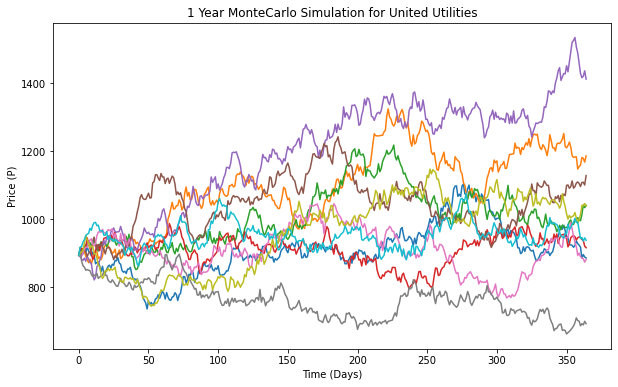

In [ ]:
def get_simulation(ticker, name):
  data = pd.DataFrame()
  data[ticker] = wb.DataReader(ticker, data_source="yahoo", start="2007-1-1")["Adj Close"]

  log_returns = np.log(1 + data.pct_change())

  u = log_returns.mean()
  var = log_returns.var()

  drift = u - (0.5 * var)
  stdev = log_returns.std()

  t_intervals = 365
  iterations = 10

  daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

  S0 = data.iloc[-1]

  price_list = np.zeros_like(daily_returns)
  price_list[0] = S0

  for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

  plt.figure(figsize = (10, 6))
  plt.title("1 Year MonteCarlo Simulation for "+ name)
  plt.ylabel("Price (P)")
  plt.xlabel("Time (Days)")
  plt.plot(price_list)
  plt.show  

get_simulation("UU.L", "United Utilities")

In [ ]:
style.use('ggplot')

start = dt.datetime(2017, 11, 20)
end = dt.datetime(2018, 11, 20)

prices = wb.DataReader('AAPL', 'yahoo', start, end)['Close']
returns = prices.pct_change()

last_price = prices[-1]

#Number​ of Simulations
num_simulations = 1000
num_days = 252

simulation_df = pd.DataFrame()

for x in range(num_simulations):
    count = 0
    daily_vol = returns.std()
    
    price_series = []
    
    price = last_price * (1 + np.random.normal(0, daily_vol))
    price_series.append(price)
    
    for y in range(num_days):
        if count == 251:
            break
        price = price_series[count] * (1 + np.random.normal(0, daily_vol))
        price_series.append(price)
        count += 1
    
    simulation_df[x] = price_series
    
fig = plt.figure()
fig.suptitle('Monte Carlo Simulation: AAPL')
plt.plot(simulation_df)
plt.axhline(y = last_price, color = 'r', linestyle = '-')
plt.xlabel('Day')
plt.ylabel('Price')
plt.show()

In [ ]:
pv = 10000
time_horizon = 30
i = 0.07
additions = 10000

for year in range(time_horizon):
  ending = pv * (1 + i) + additions
  print(locale.currency(ending, grouping = True))
  pv = ending

pv = 10000
expected_return = 0.09
volatility = 0.18
time_horizon = 30
annual_addition = 10000

print("\tReturn", "\t\tEnding Value".rjust(18))
for year in range(time_horizon):
  market_return = np.random.normal(expected_return, volatility)
  fv = pv * (1 + market_return) + annual_addition
  print("\t{}".ljust(10).format(round(market_return, 4)), "\t{}".rjust(10).format(locale.currency(fv, grouping = True)))
  pv = fv 

sim = DataFrame()
iterations = 5000

for x in range(iterations):
  expected_return = 0.09
  volatility = 0.18
  time_horizon = 30
  pv = 10000
  annual_investment = 10000
  stream = []
  for i in range(time_horizon):
    end = round(pv * (1 + np.random.normal(expected_return, volatility)) + annual_investment, 2)
    stream.append(end)
    pv = end
  
  sim[x] = stream

first_five = list(range(5))
sim[first_five]

plt.plot(sim[first_five])

print("Count:", len(sim.loc[29]))
print("Mean:", locale.currency(np.mean(sim.loc[29]), grouping = True))
print("SD:", locale.currency(np.std(sim.loc[29]), grouping = True))
print("Max:", locale.currency(np.max(sim.loc[29]), grouping = True))
print("Min:", locale.currency(np.min(sim.loc[29]), grouping = True))

ending_values = sim.loc[29]
ending_values.describe()
plt.hist(ending_values, bins = 100) #Ejecutar por separado

len(ending_values[ending_values<1000000]) / len(ending_values) 

len(ending_values[(ending_values>800000) & (ending_values<1100000)]) / len(ending_values)

p_tiles = np.percentile(ending_values, [5, 10, 15, 25, 75, 85, 90, 95])
for p in range(len(p_tiles)):
  l = [5, 10, 15, 25, 75, 85, 90, 95]
  print("{}%-ile: ".format(l[p]).rjust(15), "{}".format(locale.currency(p_tiles[p], grouping = True)))